In [1]:
# Cell 1 — Setup and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv("ptsd_secondary_dataset.csv")

print("Shape:", df.shape)
df.head()


Shape: (18908, 36)


,text,severity_score,severity_class,label,sentiment,trauma_count,page_id,react_angry,react_haha,react_like,...,nrc_joy,nrc_trust,nrc_anticipation,nrc_surprise,flesch,smog,dale_chall,word_count,sentence_count,toxicity
0,we are #live outside the national rifle associ...,114,Moderate,1,0.1027,1,2.290000e+11,54,24,993,...,1,2,2,1,36.598333,14.554593,11.839485,55,3,0.000000
1,update -2 ukrainian tourists killed in stabbin...,1227,High,2,-0.8689,2,2.290000e+11,172,8,994,...,0,0,0,0,54.190000,8.841846,12.586217,24,3,0.041667
2,proms come with us on a tour of the royal albe...,68,Moderate,1,0.4939,0,2.290000e+11,5,12,2034,...,2,0,1,1,68.215357,11.208143,9.467071,36,2,0.000000
3,thousands say their final goodbyes to bradley ...,2006,High,2,-0.4871,0,2.290000e+11,6,0,2262,...,0,0,0,0,58.222500,8.841846,12.429833,16,2,0.000000
4,"despite safety warnings, this beach near an ai...",1521,High,2,-0.4106,1,2.290000e+11,65,513,4336,...,1,1,1,0,48.635500,11.208143,10.572500,25,2,0.000000


In [3]:
# Cell 2 — Basic info and missing-values check

print("\n--- Dataset Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isna().sum())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18908 entries, 0 to 18907
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   text                     18908 non-null  object 
 1   severity_score           18908 non-null  int64  
 2   severity_class           18908 non-null  object 
 3   label                    18908 non-null  int64  
 4   sentiment                18908 non-null  float64
 5   trauma_count             18908 non-null  int64  
 6   page_id                  18908 non-null  float64
 7   react_angry              18908 non-null  int64  
 8   react_haha               18908 non-null  int64  
 9   react_like               18908 non-null  int64  
 10  react_love               18908 non-null  int64  
 11  react_sad                18908 non-null  int64  
 12  react_wow                18908 non-null  int64  
 13  shares                   18908 non-null  int64  
 14  

In [4]:
# Cell 3 — Duplicate check

duplicate_count = df.duplicated().sum()
print("Duplicate rows:", duplicate_count)

if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)


Duplicate rows: 0


In [5]:
# Cell 4 — Descriptive statistics for numeric features

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
severity_score,18908.0,5.362617e+02,1.853946e+03,0.000000e+00,1.000000e+01,6.200000e+01,3.062500e+02,6.566700e+04
label,18908.0,1.003491e+00,8.216336e-01,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
sentiment,18908.0,4.507568e-03,5.222507e-01,-9.952000e-01,-4.215000e-01,0.000000e+00,4.404000e-01,9.996000e-01
trauma_count,18908.0,2.447112e-01,6.531055e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
page_id,18908.0,1.166580e+14,3.021151e+14,5.281960e+09,1.332094e+10,6.250743e+10,1.140000e+14,1.480000e+15
react_angry,18908.0,1.896657e+02,9.424879e+02,0.000000e+00,0.000000e+00,6.000000e+00,5.300000e+01,3.156700e+04
react_haha,18908.0,1.758090e+02,9.315366e+02,0.000000e+00,1.000000e+00,8.000000e+00,5.600000e+01,6.424500e+04
react_like,18908.0,1.096385e+03,3.683150e+03,0.000000e+00,6.000000e+01,1.900000e+02,7.082500e+02,1.006110e+05
react_love,18908.0,1.012576e+02,6.275063e+02,0.000000e+00,1.000000e+00,6.000000e+00,2.900000e+01,2.472000e+04
react_sad,18908.0,8.643130e+01,6.654155e+02,0.000000e+00,0.000000e+00,3.000000e+00,1.800000e+01,3.311500e+04


/tmp/ipython-input-2471347051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='severity_class', data=df, palette='viridis')


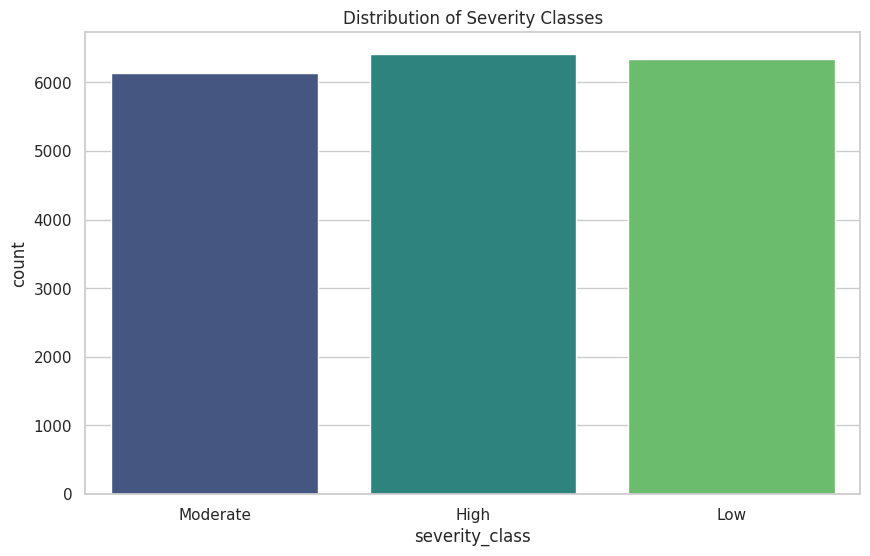

severity_class
High        6415
Low         6349
Moderate    6144
Name: count, dtype: int64


In [6]:
# Cell 5 — Severity class distribution

sns.countplot(x='severity_class', data=df, palette='viridis')
plt.title("Distribution of Severity Classes")
plt.show()

print(df['severity_class'].value_counts())


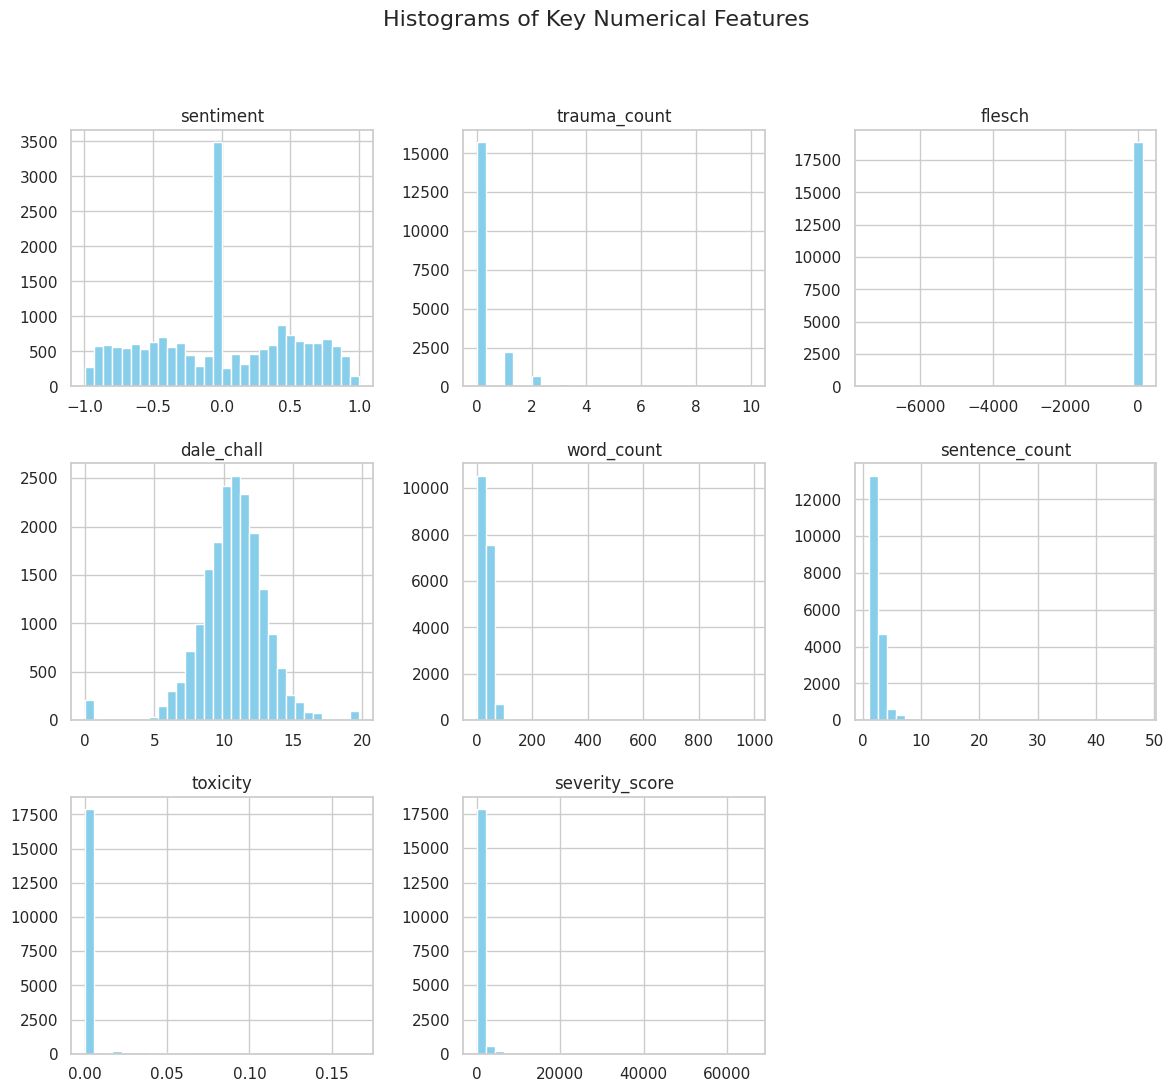

In [7]:
# Cell 6 — Histograms of numeric features

important_cols = [
    'sentiment', 'trauma_count', 'flesch', 'dale_chall',
    'word_count', 'sentence_count', 'toxicity', 'severity_score'
]

df[important_cols].hist(bins=30, figsize=(14, 12), color='skyblue')
plt.suptitle("Histograms of Key Numerical Features", fontsize=16)
plt.show()


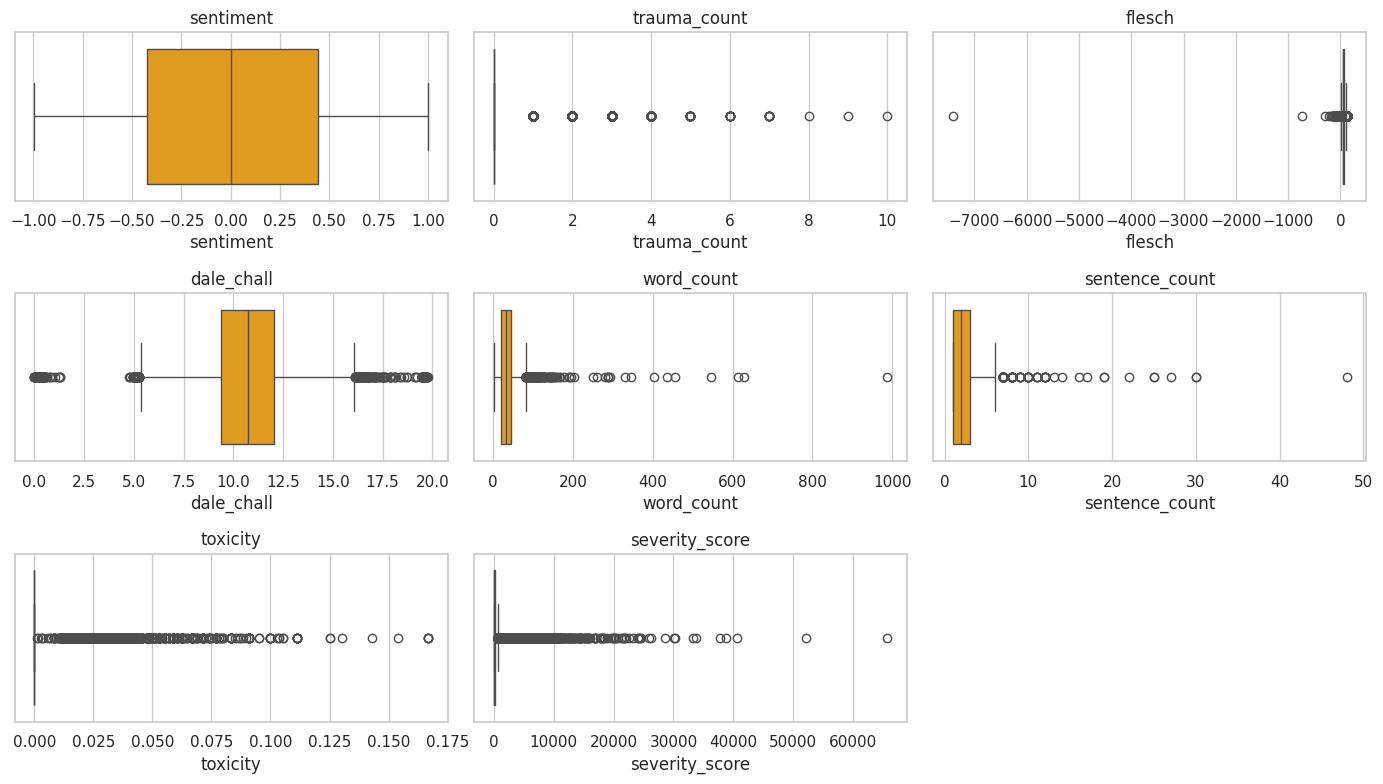

In [8]:
# Cell 7 — Boxplots to inspect outliers

plt.figure(figsize=(14, 8))
for i, col in enumerate(important_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(col)
plt.tight_layout()
plt.show()


In [9]:
# Cell 8 — Z-score outlier detection

from scipy.stats import zscore

z_scores = np.abs(zscore(df[important_cols], nan_policy='omit'))
outliers = (z_scores > 3).sum()

print("Outliers in each feature:")
print(pd.Series(outliers, index=important_cols))


Outliers in each feature:
sentiment         1645
trauma_count      1645
flesch            1645
dale_chall        1645
word_count        1645
sentence_count    1645
toxicity          1645
severity_score    1645
dtype: int64


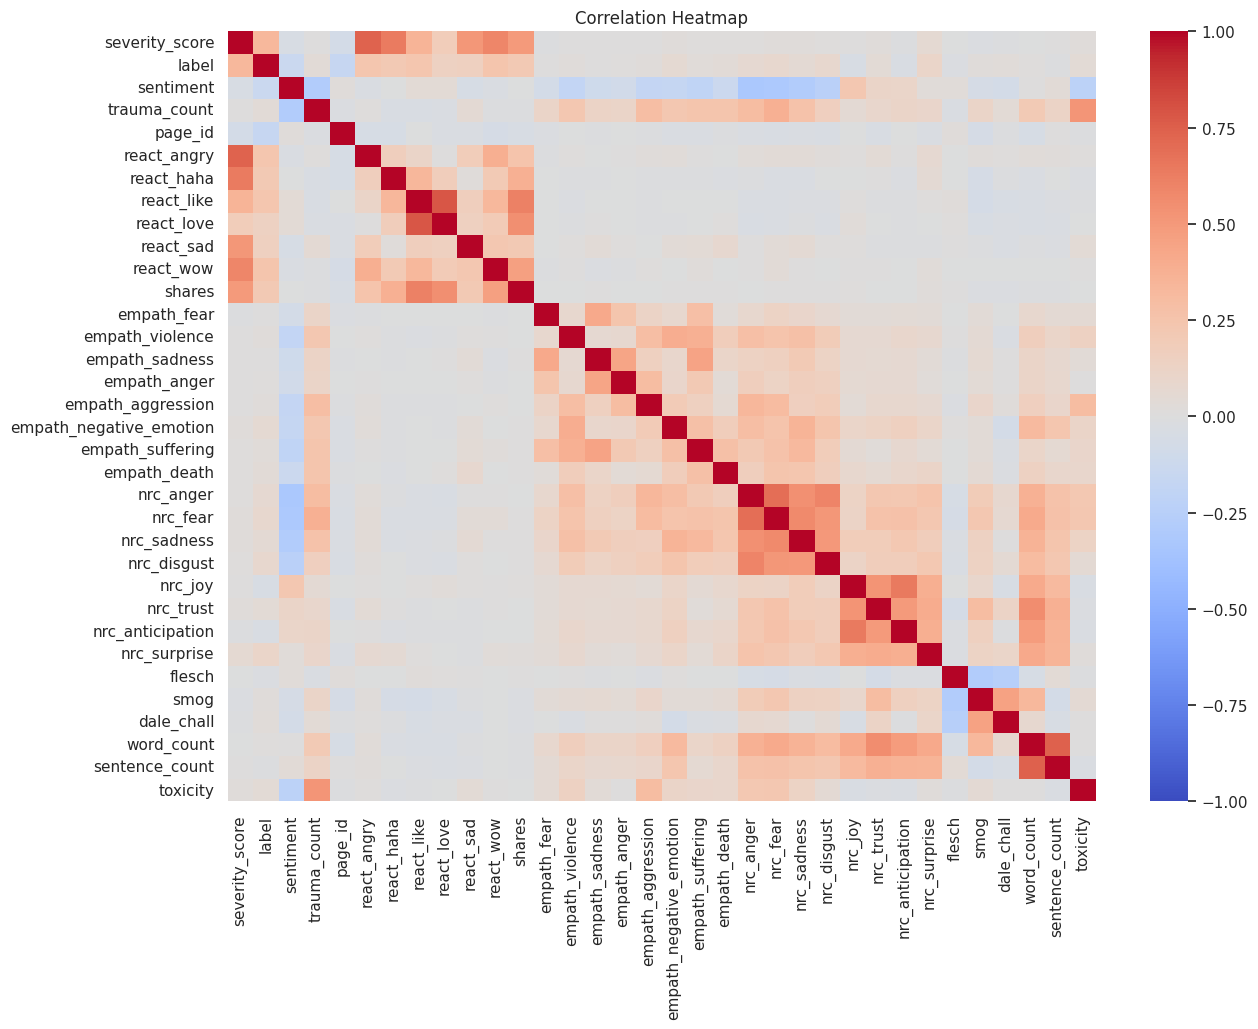

In [10]:
# Cell 9 — Correlation matrix of numeric features

plt.figure(figsize=(14, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


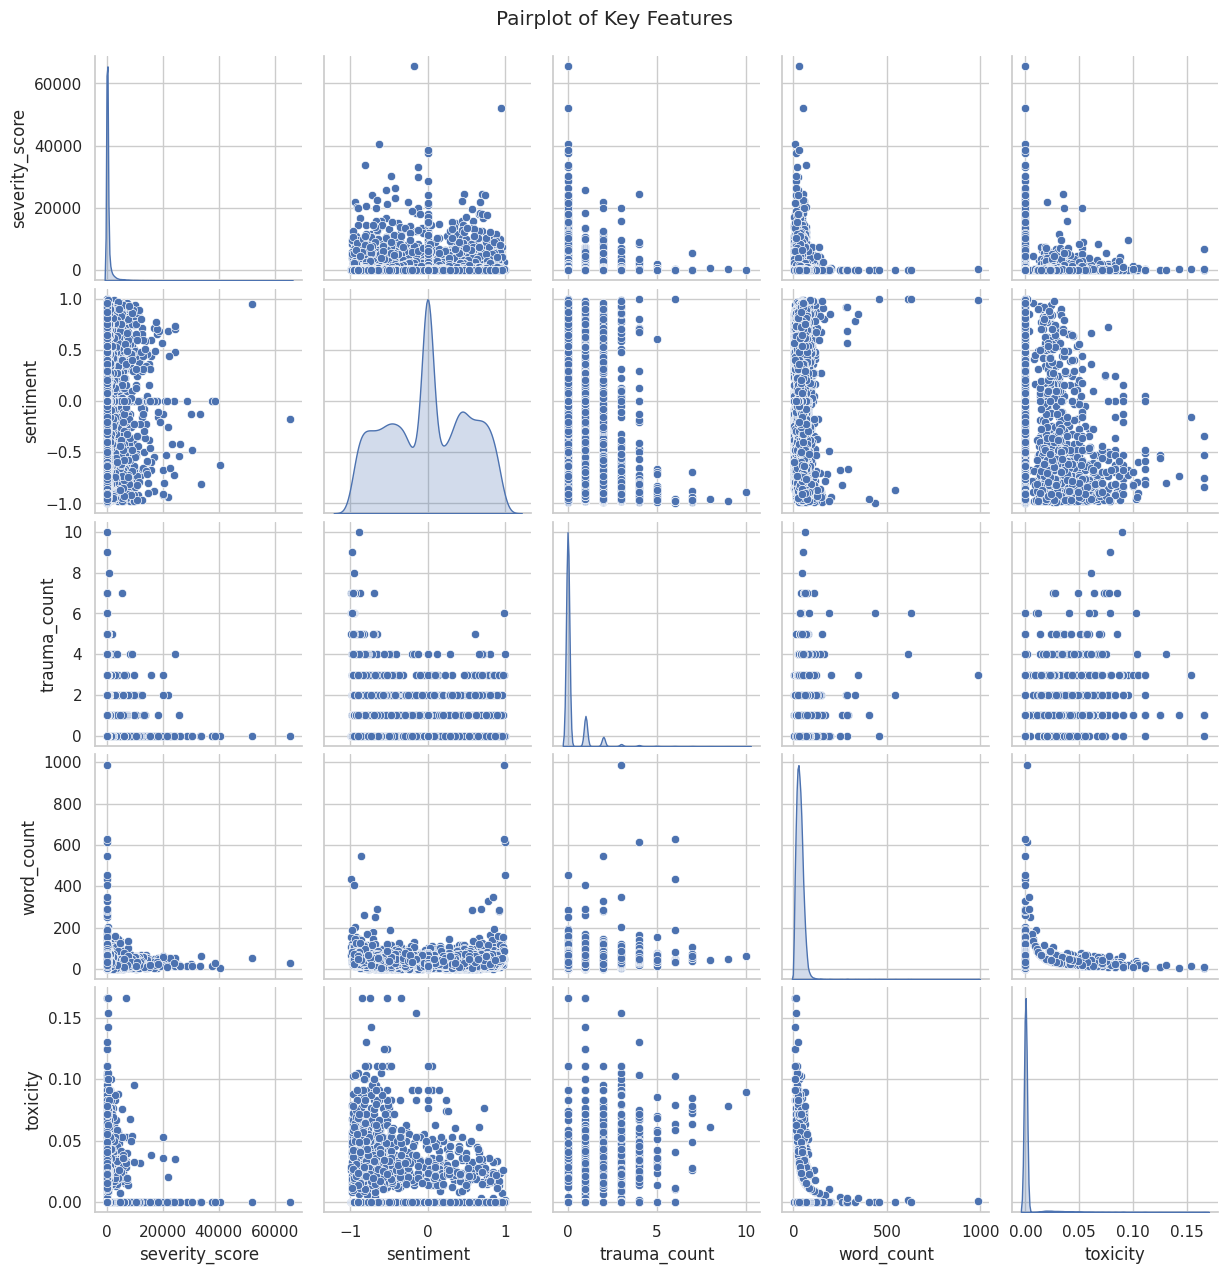

In [11]:
# Cell 10 — Pairplot between severity_score & main features

pairplot_cols = ['severity_score', 'sentiment', 'trauma_count', 'word_count', 'toxicity']

sns.pairplot(df[pairplot_cols], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


/tmp/ipython-input-4293166644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')


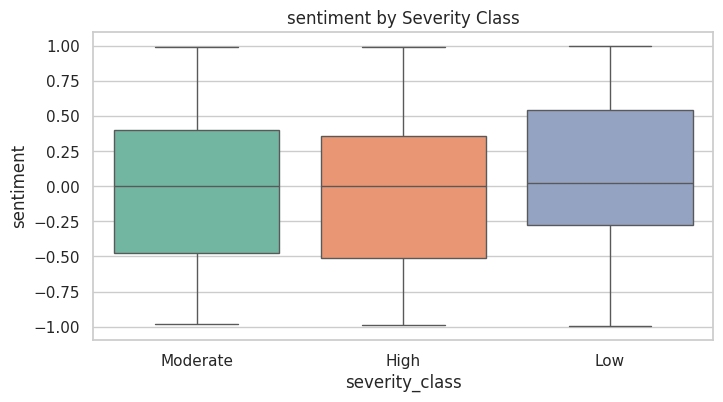

/tmp/ipython-input-4293166644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')


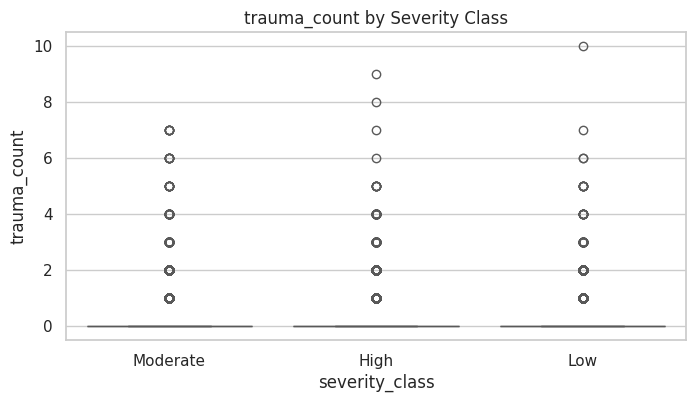

/tmp/ipython-input-4293166644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')


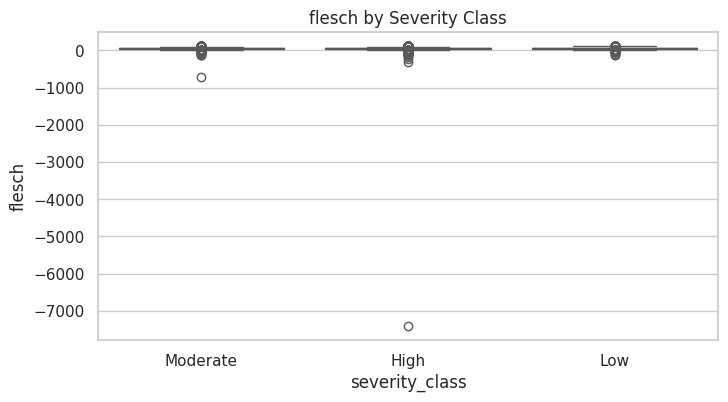

/tmp/ipython-input-4293166644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')


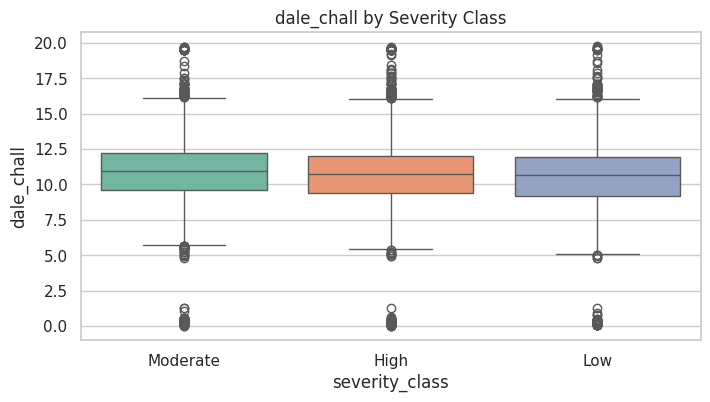

/tmp/ipython-input-4293166644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')


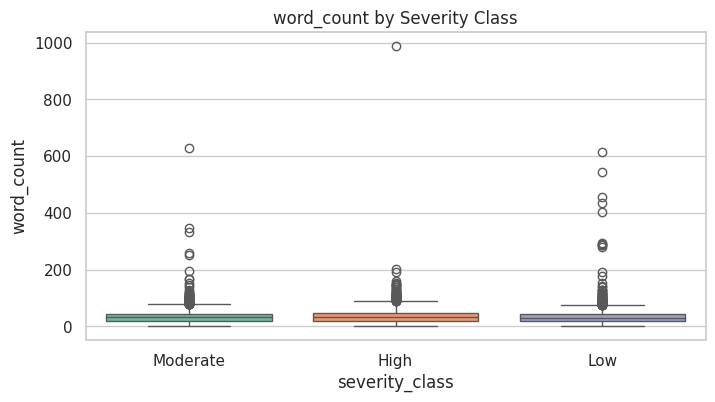

/tmp/ipython-input-4293166644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')


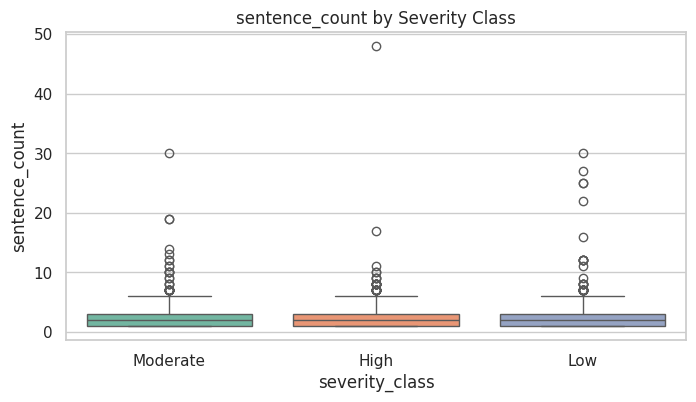

/tmp/ipython-input-4293166644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')


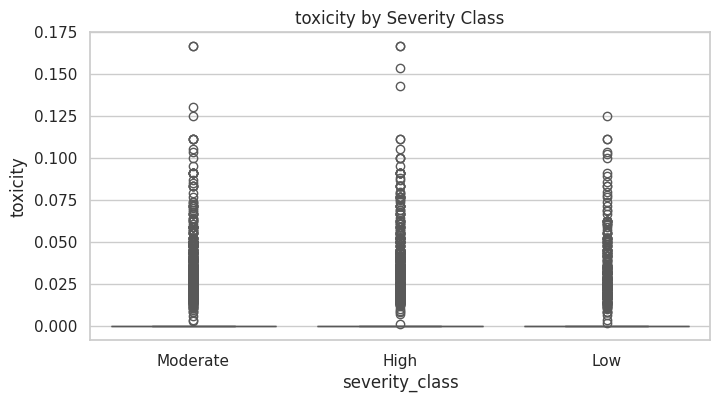

/tmp/ipython-input-4293166644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')


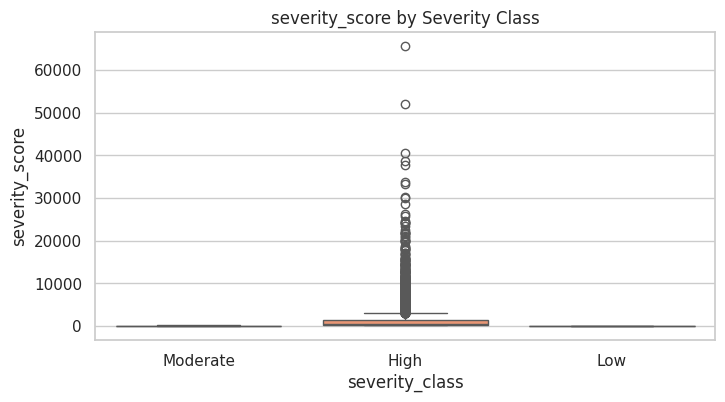

In [12]:
# Cell 11 — Visualizing how features change across severity classes

for col in important_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='severity_class', y=col, data=df, palette='Set2')
    plt.title(f"{col} by Severity Class")
    plt.show()


In [13]:
# Cell 12 — Generate text-based summary of findings

summary = []

summary.append("=== EDA Summary ===")
summary.append(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
summary.append("No major missing values found." if df.isna().sum().sum()==0 else "Some missing values present.")
summary.append("Severity classes are fairly balanced." if df['severity_class'].value_counts().std() < 500 else "Severity classes show imbalance.")

corr_target = df[numeric_cols].corr()['severity_score'].sort_values(ascending=False)
summary.append("\nTop correlations with severity_score:")
summary.append(corr_target.head(10).to_string())

summary.append("\nLowest correlations with severity_score:")
summary.append(corr_target.tail(10).to_string())

print("\n".join(summary))


=== EDA Summary ===
Dataset contains 18908 rows and 36 columns.
No major missing values found.
Severity classes are fairly balanced.

Top correlations with severity_score:
severity_score    1.000000
react_angry       0.739943
react_haha        0.637657
react_wow         0.586870
react_sad         0.510412
shares            0.492330
react_like        0.356771
label             0.332809
react_love        0.183563
nrc_surprise      0.061928

Lowest correlations with severity_score:
empath_anger        0.000457
empath_sadness      0.000111
flesch             -0.001336
word_count         -0.005354
empath_fear        -0.009433
dale_chall         -0.012233
nrc_anticipation   -0.012328
smog               -0.023128
sentiment          -0.040063
page_id            -0.075192
